In [278]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, ensemble, svm, neighbors, model_selection, preprocessing, decomposition

In [279]:
# Loading the dataset into a dataframe

df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [281]:
# Data Preprocessing

print(sum(df['education'].isna()))
df['education'].fillna(0.0, inplace = True)

print(sum(df['cigsPerDay'].isna()))
df['cigsPerDay'].fillna(0.0, inplace = True)

print(sum(df['BPMeds'].isna()))
df['BPMeds'].fillna(0.0, inplace = True)

print(sum(df['BMI'].isna()))
df['BMI'].fillna(np.mean(df['BMI']), inplace = True)

print(sum(df['totChol'].isna()))
df['totChol'].fillna(np.mean(df['totChol']), inplace = True)

print(sum(df['glucose'].isna()))
df['glucose'].fillna(np.mean(df['glucose']), inplace = True)

df.dropna(inplace = True)

105
29
53
19
50
388


In [282]:
processed_df = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4237 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4237 non-null   int64  
 1   age              4237 non-null   int64  
 2   education        4237 non-null   float64
 3   currentSmoker    4237 non-null   int64  
 4   cigsPerDay       4237 non-null   float64
 5   BPMeds           4237 non-null   float64
 6   prevalentStroke  4237 non-null   int64  
 7   prevalentHyp     4237 non-null   int64  
 8   diabetes         4237 non-null   int64  
 9   totChol          4237 non-null   float64
 10  sysBP            4237 non-null   float64
 11  diaBP            4237 non-null   float64
 12  BMI              4237 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          4237 non-null   float64
 15  TenYearCHD       4237 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 562.7 KB


In [283]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000,4237.000000
mean,0.429077,49.581544,1.930139,0.493982,8.939344,0.029266,0.005900,0.310361,0.025726,236.725768,132.342931,82.895327,25.801184,75.878924,81.964621,0.151758
std,0.495003,8.570310,1.053046,0.500023,11.902990,0.168571,0.076596,0.462696,0.158335,44.330848,22.032062,11.911638,4.071080,12.026596,22.838877,0.358829
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.030000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


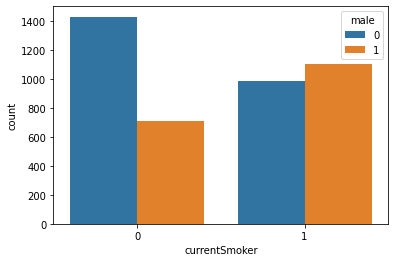

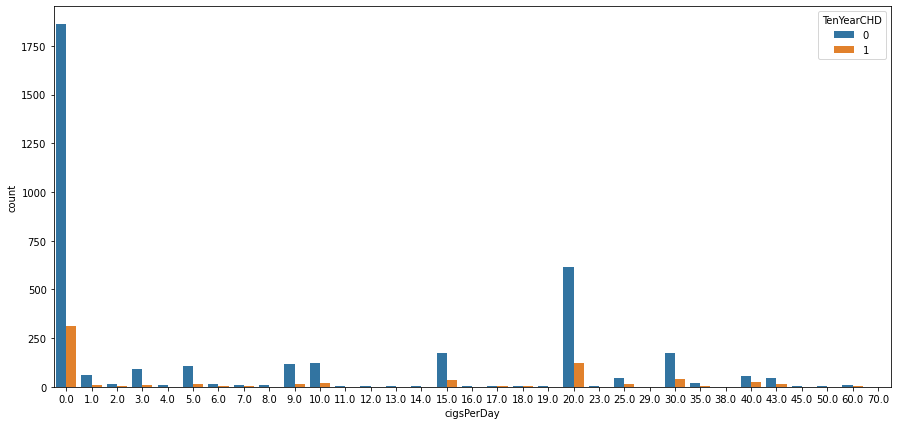

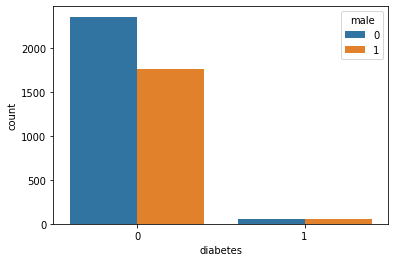

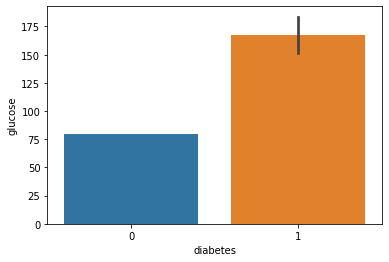

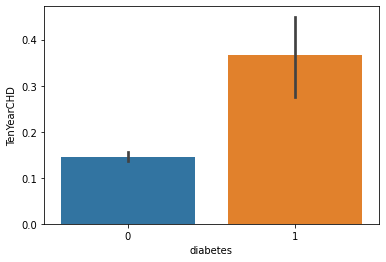

In [284]:
# Visualizing the data

sns.countplot(x = 'currentSmoker', hue = 'male', data = df)
plt.show()

plt.figure(figsize = (15, 7))
sns.countplot(x = 'cigsPerDay', hue = 'TenYearCHD', data = df)
plt.show()

sns.countplot(x = 'diabetes', hue = 'male', data = df)
plt.show()

sns.barplot(x = 'diabetes', y = 'glucose', data = df)
plt.show()

sns.barplot(x = 'diabetes', y = 'TenYearCHD', data = df)
plt.show()

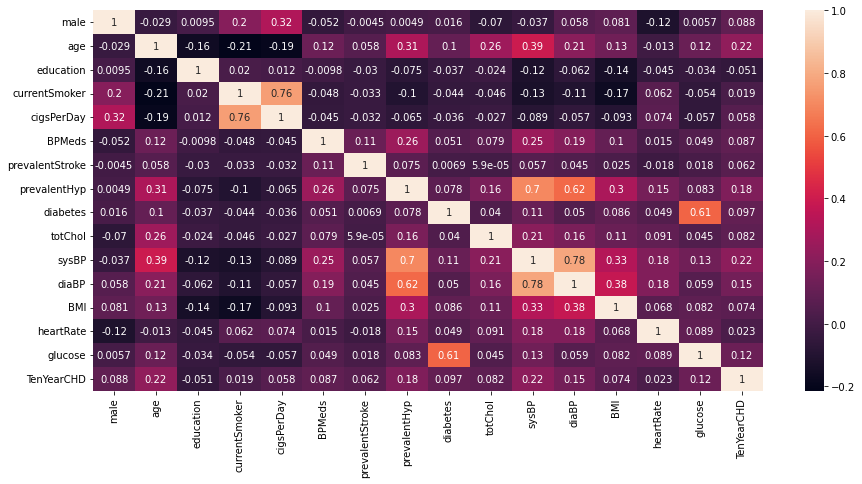

In [285]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [286]:
# Scaling the features

scaler = preprocessing.StandardScaler()

for x in df.columns[:-1]:
    df[x] = scaler.fit_transform(df[[x]])
        
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.153509,-1.234820,1.965827,-0.988035,-0.751105,-0.173633,-0.077042,-0.670846,-0.162496,-0.941347,-1.195805,-1.082710,0.287136,0.342704,-0.217402,0
1,-0.866920,-0.417951,0.066349,-0.988035,-0.751105,-0.173633,-0.077042,-0.670846,-0.162496,0.299471,-0.514898,-0.159134,0.719505,1.590087,-0.261192,0
2,1.153509,-0.184559,-0.883389,1.012110,0.929343,-0.173633,-0.077042,-0.670846,-0.162496,0.186669,-0.219839,-0.243096,-0.113296,-0.073090,-0.523933,0
3,-0.866920,1.332484,1.016088,1.012110,1.769567,-0.173633,-0.077042,1.490655,-0.162496,-0.264537,0.801521,1.016326,0.682655,-0.904679,0.921143,1
4,-0.866920,-0.417951,1.016088,1.012110,1.181410,-0.173633,-0.077042,-0.670846,-0.162496,1.089082,-0.106354,0.092750,-0.663584,0.758498,0.132920,0


In [296]:
# Reducing the number of dimensions using PCA

X = df.drop('TenYearCHD', axis = 1).values
y = df['TenYearCHD'].values

pc = decomposition.PCA(n_components = 15)

new_df = pd.DataFrame(pc.fit_transform(X), columns = pc.get_feature_names_out())
new_df['TenYearCHD'] = y
new_df.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,TenYearCHD
0,-1.804193,-0.999761,0.017858,0.457821,0.616083,-2.015289,-0.491560,0.966768,0.770791,1.241077,-0.183829,-0.256060,-0.377354,0.015963,0.223739,0
1,-0.022185,-1.244621,-0.221004,-1.403862,-0.337636,-0.424997,0.753541,0.749010,1.031430,0.510618,-0.244057,-0.063840,0.244673,0.153427,-0.116676,0
2,-1.016659,1.430760,-0.127728,0.555534,-0.727556,0.696851,0.269553,-0.045840,0.232421,0.318072,0.352485,-0.067243,0.385813,-0.152132,0.171138,0
3,1.419330,1.673345,0.157178,0.127091,0.412539,-0.042957,-1.009463,-0.266126,-1.007936,-1.557894,-1.695477,0.595562,-0.588904,0.647642,-0.567637,1
4,-0.825348,1.054217,0.141305,-1.793298,0.544110,0.447801,-0.786506,0.533801,0.167239,-0.503648,-0.034676,0.398971,0.436542,0.250083,-0.083282,0


In [297]:
# Scaling the principal components

scaler = preprocessing.MinMaxScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(new_df.drop('TenYearCHD', axis = 1)), columns = new_df.columns[:-1])
scaled_df['TenYearCHD'] = new_df['TenYearCHD']

scaled_df.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,TenYearCHD
0,0.187875,0.209661,0.145638,0.480501,0.220588,0.162187,0.329497,0.448855,0.518236,0.656752,0.361744,0.475342,0.350461,0.345888,0.447560,0
1,0.322125,0.177300,0.131006,0.298028,0.152112,0.322141,0.448640,0.431959,0.548929,0.553724,0.353694,0.493740,0.451869,0.378963,0.370954,0
2,0.247205,0.530879,0.136720,0.490078,0.124116,0.434978,0.402327,0.370284,0.454837,0.526566,0.433429,0.493414,0.474879,0.305442,0.435723,0
3,0.430724,0.562940,0.154172,0.448084,0.205973,0.360567,0.279939,0.353192,0.308771,0.261967,0.159694,0.556852,0.315973,0.497878,0.269471,1
4,0.261618,0.481115,0.153200,0.259858,0.215420,0.409928,0.301274,0.415260,0.447161,0.410665,0.381680,0.538036,0.483149,0.402220,0.378469,0


In [298]:
# Performing k-fold cross validation

X = scaled_df.drop('TenYearCHD', axis = 1).values
y = scaled_df['TenYearCHD'].values

lg_scores, svm_scores, rf_scores, knn_scores = [], [], [], []

def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

lg = linear_model.LogisticRegression()
svm_ = svm.SVC()
rf = ensemble.RandomForestClassifier(n_estimators = 50)
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)

kf = model_selection.StratifiedKFold(n_splits = 10)

for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lg_scores.append(train_model(lg, X_train, X_test, y_train, y_test))
    svm_scores.append(train_model(svm_, X_train, X_test, y_train, y_test))
    rf_scores.append(train_model(rf, X_train, X_test, y_train, y_test))
    knn_scores.append(train_model(knn, X_train, X_test, y_train, y_test))

In [299]:
avg = lambda x : sum(x) / len(x)

print(avg(lg_scores))
print(avg(svm_scores))
print(avg(rf_scores))
print(avg(knn_scores))

0.8529628886212587
0.8475344573799012
0.845645992238726
0.8102446585485525


In [ ]:
# Tuning the hyper-parameters

param_grid = {
    'C' : [1, 2, 3, 4, 5],
    'gamma' : ['auto', 'scale'],
    'kernel' : ['linear', 'rbf', 'poly'],
    'degree' : [1, 2, 3],
}

classifier = model_selection.GridSearchCV(svm.SVC(), param_grid, cv = 10)

classifier.fit(X, y)

In [ ]:
print(classifier.best_params_)
print(classifier.best_score_)

In [ ]:
result = pd.DataFrame(classifer.cv_results_)
result.head()